#### Done By:
##### Ankit Sharma 
##### Sri Venkatesh Subramaniam

In [1]:
# Link to Dataset: https://www.kaggle.com/datasets/dgawlik/nyse

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



In [3]:
# Loading the dataset
data = pd.read_csv('prices-split-adjusted.csv')

# Displaying the first few rows of the dataset
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
data.shape

(851264, 7)

In [5]:
# we have 851264 rows

In [6]:
# Data Analysis

# Checking for missing values
print('Missing values in each column:\n', data.isnull().sum())

# Summary statistics
print('Summary statistics:\n', data.describe())

# Checking the number of unique symbols
print('Number of unique symbols:', data['symbol'].nunique())



Missing values in each column:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Summary statistics:
                 open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  
Number of unique symbols: 501


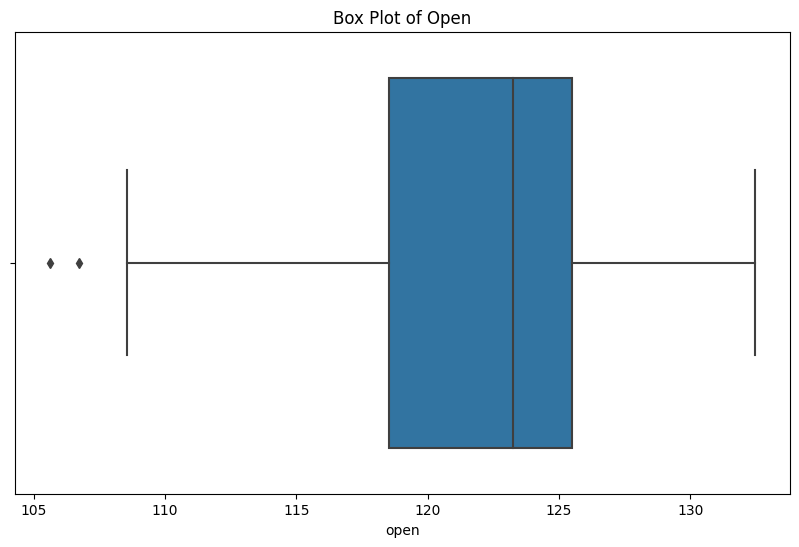

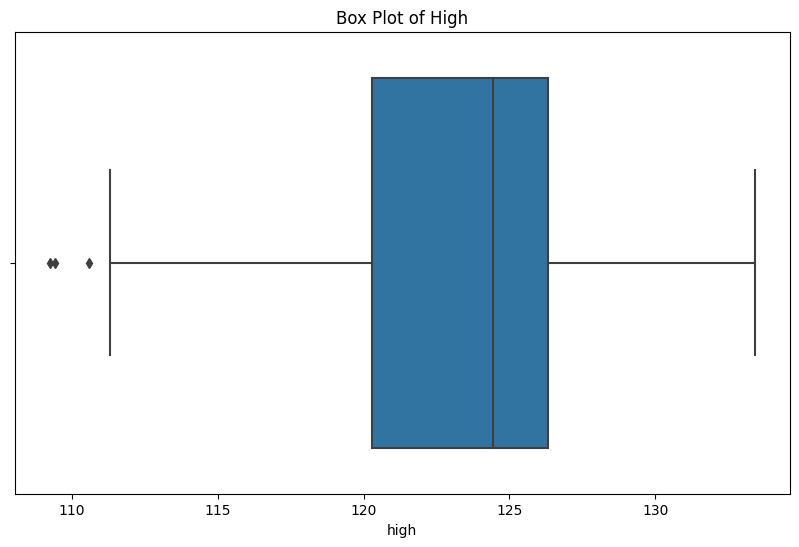

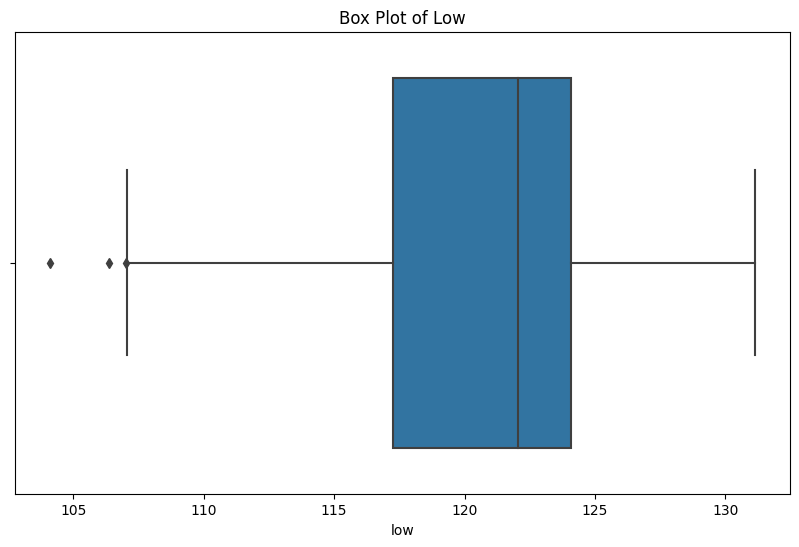

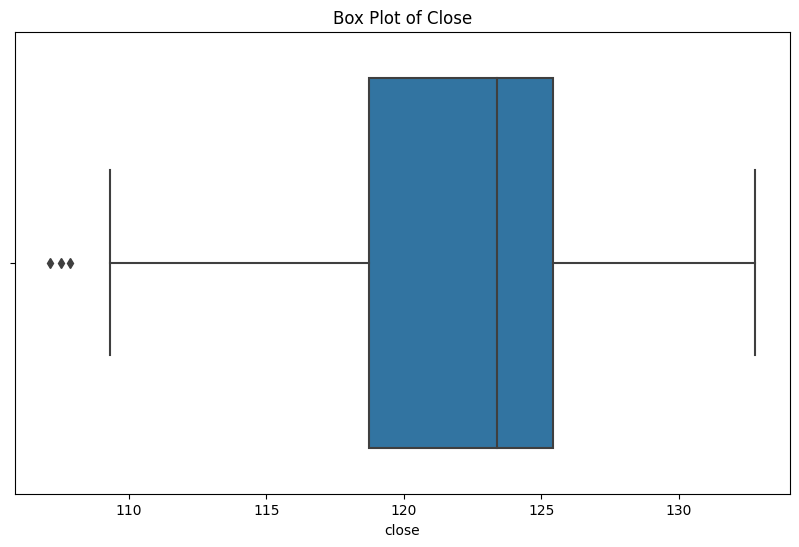

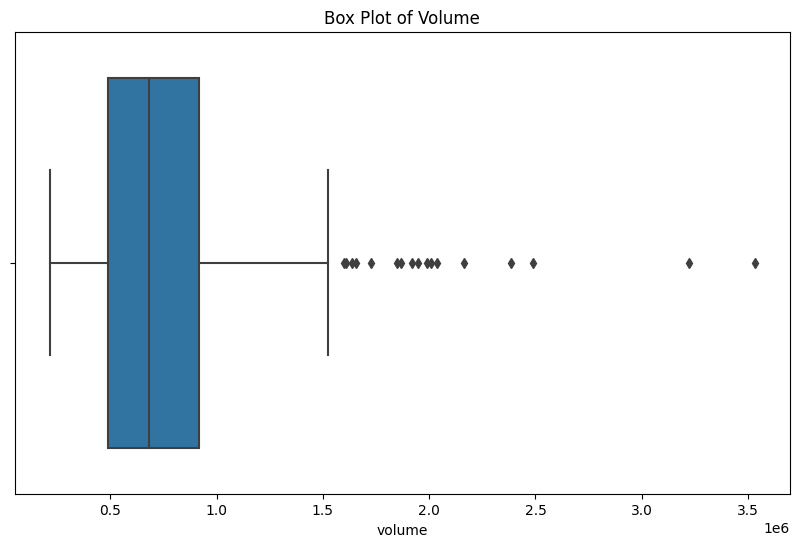

In [46]:
# Visualizing the data for one stock : 

import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for each feature
features = ['open', 'high', 'low', 'close', 'volume']

data_wltw = data[data['symbol'] == 'WLTW']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = data_wltw, x=feature)
    plt.title(f'Box Plot of {feature.title()}')
    plt.show()


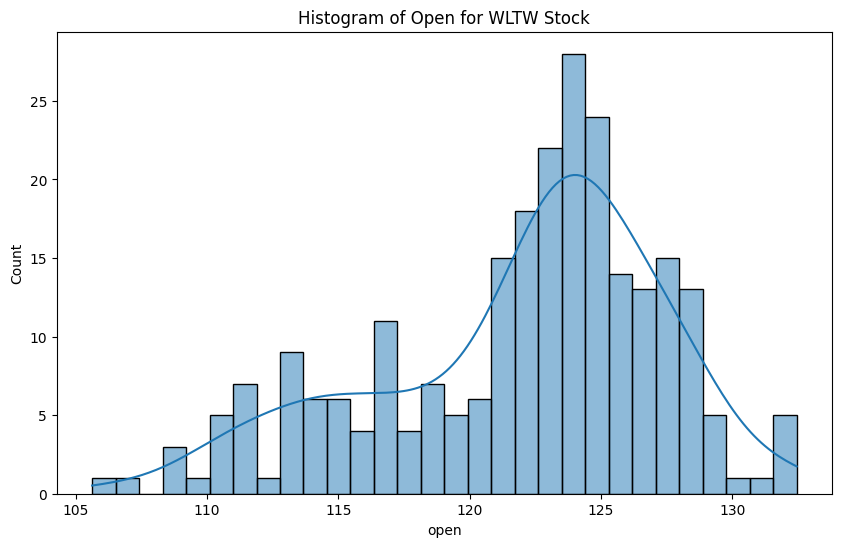

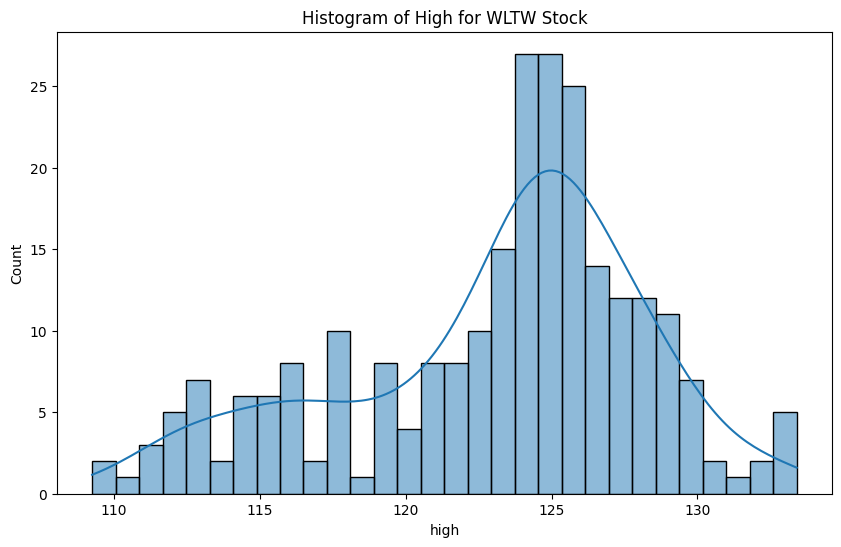

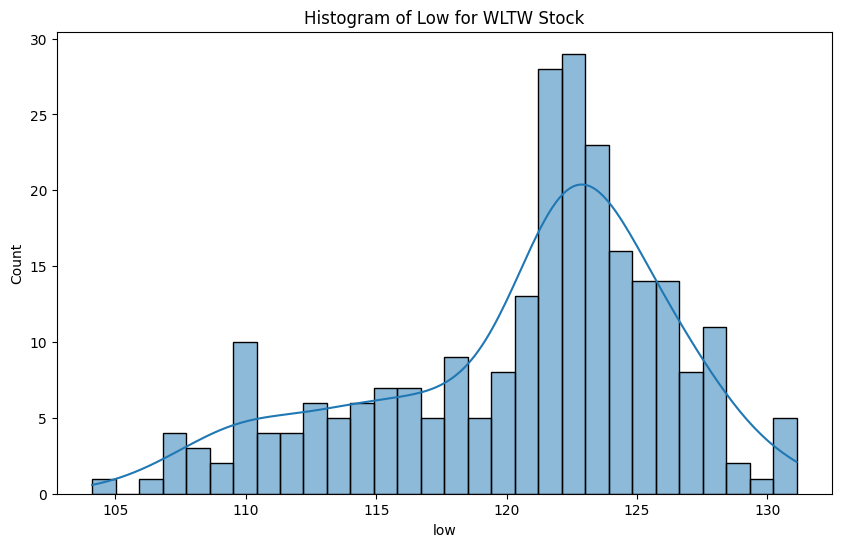

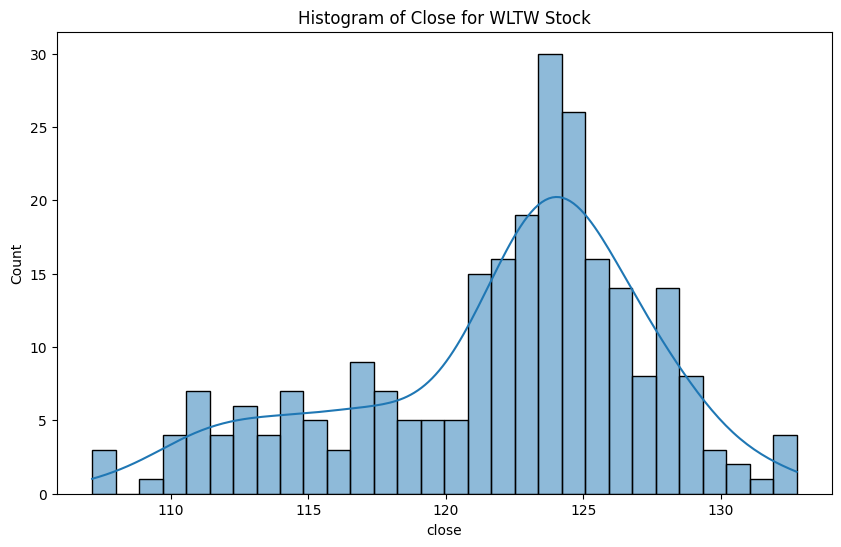

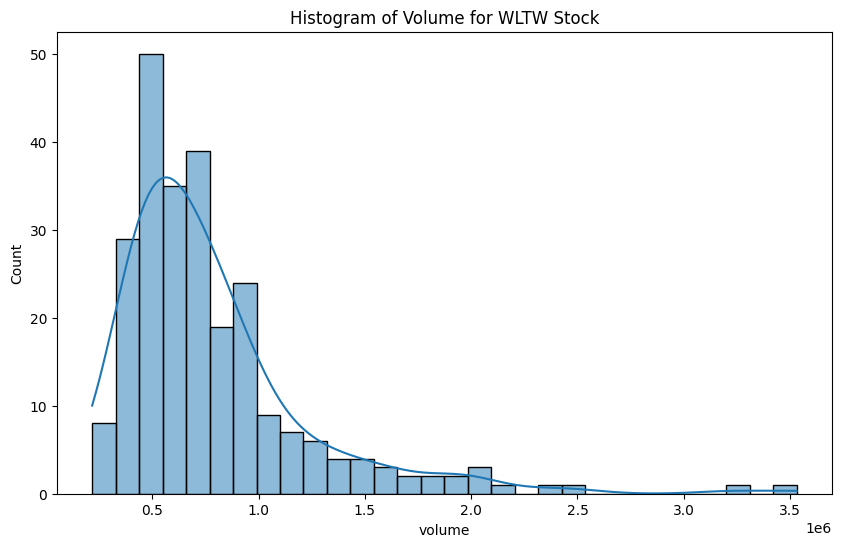

In [47]:
# Histograms for 'WLTW' Stock

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_wltw[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature.title()} for WLTW Stock')
    plt.show()

In [7]:
# Since we have 851264 rows and 501 stocks, lets reduce by half. (Datatset too large)

# Reducing the Number of Stocks 

# Selecting a subset of stocks
unique_symbols = data['symbol'].unique()
selected_symbols = unique_symbols[:len(unique_symbols)//2]
data_reduced = data[data['symbol'].isin(selected_symbols)]



In [8]:
data = data_reduced
data.shape

(438989, 7)

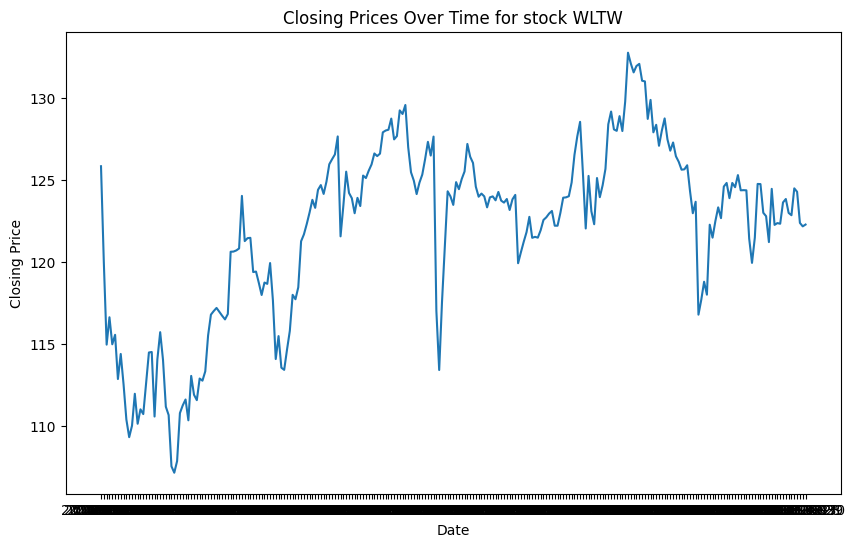

In [9]:
# Plottinging
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the closing prices of the stocks
plt.figure(figsize=(10,6))
sns.lineplot(data=data[data["symbol"]=="WLTW"], x='date', y='close')
plt.title('Closing Prices Over Time for stock WLTW')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [10]:
# Feature Engineering

# Convert 'date' to datetime and extract year, month, and day
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day



In [11]:
# Create new features: day of the week and whether it's the start of the month
data['day_of_week'] = data['date'].dt.dayofweek
data['start_of_month'] = (data['date'].dt.is_month_start).astype(int)



In [12]:
# Display the updated DataFrame
print('Updated DataFrame with new features:\n', data.head())

Updated DataFrame with new features:
         date symbol        open       close         low        high  \
0 2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2 2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3 2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4 2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  year  month  day  day_of_week  start_of_month  
0  2163600.0  2016      1    5            1               0  
1  2386400.0  2016      1    6            2               0  
2  2489500.0  2016      1    7            3               0  
3  2006300.0  2016      1    8            4               0  
4  1408600.0  2016      1   11            0               0  


In [13]:
# Preprocessing

# Selecting features and target variable
X = data[['open', 'low', 'high', 'volume', 'year', 'month', 'day', 'day_of_week', 'start_of_month']]
y = data['close']



In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Training Models

# Linear Regression Model
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train_scaled, y_train)




LinearRegression(n_jobs=-1)

In [17]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1,n_estimators=8)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=8, n_jobs=-1, random_state=42)

In [18]:
# Predictions
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

# Evaluating the models
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
print('Mean Squared Error for Linear Regression:', mse_lin_reg)
print('Mean Squared Error for Random Forest Regressor:', mse_rf_reg)


Mean Squared Error for Linear Regression: 0.3484235597150423
Mean Squared Error for Random Forest Regressor: 0.449457789659776


In [19]:
# Using more metrics:

from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression Metrics
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print('Linear Regression - Mean Absolute Error:', mae_lin_reg)
print('Linear Regression - R2 Score:', r2_lin_reg)

# Random Forest Regressor Metrics
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
print('Random Forest Regressor - Mean Absolute Error:', mae_rf_reg)
print('Random Forest Regressor - R2 Score:', r2_rf_reg)

Linear Regression - Mean Absolute Error: 0.29844095761202577
Linear Regression - R2 Score: 0.9999405840162443
Random Forest Regressor - Mean Absolute Error: 0.32306061131366864
Random Forest Regressor - R2 Score: 0.9999233548479008


In [30]:
# Resampling Data due to enormous size of dataset

sampled_data = data.sample(frac=0.1, random_state=42) 

X = sampled_data[['open', 'low', 'high', 'volume', 'year', 'month', 'day', 'day_of_week', 'start_of_month']]
y = sampled_data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Random Forest Regressor for new down-sized dataset
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1,n_estimators=8)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
print('Metrics for newly trained Random Forest with down-sized data')
print('Mean Squared Error for Random Forest Regressor:', mse_rf_reg)
print('Random Forest Regressor - Mean Absolute Error:', mae_rf_reg)
print('Random Forest Regressor - R2 Score:', r2_rf_reg)

Metrics for newly trained Random Forest with down-sized data
Mean Squared Error for Random Forest Regressor: 0.7968799396629952
Random Forest Regressor - Mean Absolute Error: 0.3540006356716482
Random Forest Regressor - R2 Score: 0.9998649220209667


In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter Tuning:
param_grid = {
    'n_estimators': [8, 9],
    'max_features': ['sqrt', 'log2', None],
    'criterion' :['absolute_error', 'squared_error','fried']
}
CV_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv= 3, n_jobs=-1)
CV_rf.fit(X_train_scaled, y_train)

# Best parameters
print('Best parameters for Random Forest Regressor:', CV_rf.best_params_)


Best parameters for Random Forest Regressor: {'criterion': 'squared_error', 'max_features': None, 'n_estimators': 9}


In [40]:
# Test Results with Best Parameters

# Re-training the Random Forest model with the best parameters
rf_reg_best = RandomForestRegressor(**CV_rf.best_params_, random_state=42,n_jobs=-1)
rf_reg_best.fit(X_train_scaled, y_train)

# Predictions with the best model
y_pred_rf_best = rf_reg_best.predict(X_test_scaled)

# Evaluating the best model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
print('Mean Squared Error with Best Parameters:', mse_rf_best)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_best)
print(' Mean Absolute Error:', mae_rf_reg)

r2_rf_reg = r2_score(y_test, y_pred_rf_best)
print('Random Forest Regressor - R2 Score:', r2_rf_reg)





Mean Squared Error with Best Parameters: 0.8218174641026262
 Mean Absolute Error: 0.3528136063922328
Random Forest Regressor - R2 Score: 0.9998606948968596


In [41]:
# We have achieved lower Mean Abolute Error at the cost of slightly increased Mean Squared Error and R2 score 
# In this Business Problem, We beleive the best Mean Absolute error is the best compared to Mean Squared error and/or R2 Score